# Get stock data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get stock prices
# https://www.quora.com/Using-Python-whats-the-best-way-to-get-stock-data

In [3]:
start_date = '2016-01-01'
end_date = '2018-06-30'

[*********************100%***********************]  1 of 1 downloaded


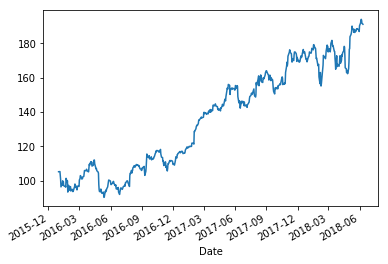

In [4]:
# Daily Data -- Yahoo Finance
import fix_yahoo_finance as yf # pip install fix_yahoo_finance
data = yf.download('AAPL', start_date, end_date)
data.Close.plot()
plt.show()

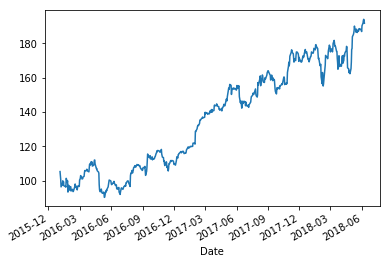

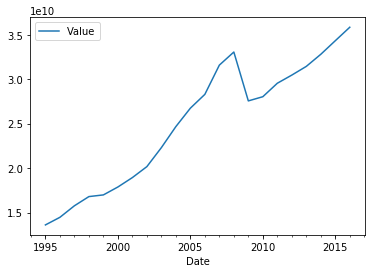

In [5]:
# Daily Data -- Quandl (vary many financial and other data !!!)
# Note:
# 1. Quandl requires NumPy (v1.8 or above) and pandas (v0.14 or above) to work.
# 2. To get your API key, sign up for a free Quandl account. Then, you can find your API key on Quandl account settings page.
# 3. To fetch data for different markets and types, refer to Quandl
import quandl # pip install quandl
api_key='YUBHkx_4xKLzp-gr2i4L'
#data = quandl.get("WIKI//KO", start_date="2016-01-01", end_date="2018-01-01", api_key=<Your_API_Key>)

data = quandl.get("EOD/AAPL", start_date=start_date, end_date=end_date, api_key=api_key)
data.Close.plot()
plt.show()

# Gross domestic income (constant LCU) - Lithuania
data = quandl.get("WWDI/LTU_NY_GDY_TOTL_KN", start_date='1990-01-01', end_date='2018-06-30', api_key=api_key)
data.plot()
plt.show()


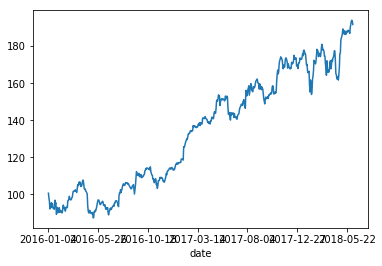

,open,high,low,close,volume
date,,,,,
2018-06-04,191.635,193.42,191.350,191.83,26266174
2018-06-05,193.065,193.94,192.360,193.31,21565963
2018-06-06,193.630,194.08,191.920,193.98,20933619
2018-06-07,194.140,194.20,192.335,193.46,21347180
2018-06-08,191.170,192.00,189.770,191.70,26656799


In [6]:
# Daily Data -- IEX Finance
# https://github.com/addisonlynch/iexfinance
from iexfinance import get_historical_data # pip install iexfinance
from datetime import datetime
 
data = get_historical_data(
    'AAPL', 
    start=pd.to_datetime(start_date), 
    end=pd.to_datetime(end_date), 
    output_format='pandas')
 
data.close.plot()
plt.show()

data.tail()

In [7]:
# Minute level data -- Alpha vantage
# https://www.alphavantage.co/documentation/#intraday
# free API key exits: https://www.alphavantage.co/support/#api-key
from alpha_vantage.timeseries import TimeSeries # pip install alpha_vantage
ts = TimeSeries(key='EJ69MPM068NGTJ30', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
print(data.head())

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2018-06-11 10:11:00  100.979   101.00  100.940   100.950    38352.0
2018-06-11 10:12:00  100.955   101.05  100.955   101.035    30214.0
2018-06-11 10:13:00  101.035   101.05  101.000   101.020    28284.0
2018-06-11 10:14:00  101.015   101.07  101.000   101.005    43205.0
2018-06-11 10:15:00  101.000   101.03  100.990   101.010    50166.0


In [1]:
# datareader - many sources
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
from pandas_datareader import wb
mathces = wb.search('gdp.*capita.*const')
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX', 'SE'], start=2010, end=2016)
print(dat)

                    NY.GDP.PCAP.KD
country       year                
Canada        2016    50407.341330
              2015    50303.836848
              2014    50221.841982
              2013    49359.422470
              2012    48724.245800
              2011    48456.964574
              2010    47447.476024
Mexico        2016     9707.908005
              2015     9615.312229
              2014     9492.990889
              2013     9409.965371
              2012     9414.906078
              2011     9183.328078
              2010     8959.581416
Sweden        2016    56473.022779
              2015    55395.058708
              2014    53561.892121
              2013    52722.912297
              2012    52519.680437
              2011    53061.568572
              2010    52076.255913
United States 2016    52364.244025
              2015    51956.583468
              2014    50881.106863
              2013    49976.628767
              2012    49497.585853
              2011  

In [2]:
mathces

,id,name,source,sourceNote,sourceOrganization,topics,unit
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth,
7849,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
7851,NY.GDP.PCAP.KN,GDP per capita (constant LCU),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
7853,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",World Development Indicators,GDP per capita based on purchasing power parit...,"b'World Bank, International Comparison Program...",Economy & Growth,
7854,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",WDI Database Archives,,b'',,
